In [1]:
#%%

from collections import Counter
import re

import matplotlib.pyplot as plt
import numpy as np
from nltk import pos_tag
from nltk.corpus import inaugural, stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from PIL import Image
from wordcloud import ImageColorGenerator, WordCloud

In [2]:
#%%

ps = PorterStemmer()
stop_words = set(stopwords.words('english'))
speech_ids = inaugural.fileids()[-5:]

In [3]:
#%% Extract the raw text from the latest 5 speeches

a = raw_speeches = inaugural.raw(fileids=speech_ids)

print(a)

President Clinton, distinguished guests and my fellow citizens, the peaceful transfer of authority is rare in history, yet common in our country. With a simple oath, we affirm old traditions and make new beginnings.

As I begin, I thank President Clinton for his service to our nation. 

And I thank Vice President Gore for a contest conducted with spirit and ended with grace. 

I am honored and humbled to stand here, where so many of America's leaders have come before me, and so many will follow.

We have a place, all of us, in a long story--a story we continue, but whose end we will not see. It is the story of a new world that became a friend and liberator of the old, a story of a slave-holding society that became a servant of freedom, the story of a power that went into the world to protect but not possess, to defend but not to conquer.

It is the American story--a story of flawed and fallible people, united across the generations by grand and enduring ideals. 

The grandest of these 

In [4]:
#%% Tokenize the raw text of these speeches into sentences

b = speeches_sentence_tokens = sent_tokenize(raw_speeches)

print(b)

['President Clinton, distinguished guests and my fellow citizens, the peaceful transfer of authority is rare in history, yet common in our country.', 'With a simple oath, we affirm old traditions and make new beginnings.', 'As I begin, I thank President Clinton for his service to our nation.', 'And I thank Vice President Gore for a contest conducted with spirit and ended with grace.', "I am honored and humbled to stand here, where so many of America's leaders have come before me, and so many will follow.", 'We have a place, all of us, in a long story--a story we continue, but whose end we will not see.', 'It is the story of a new world that became a friend and liberator of the old, a story of a slave-holding society that became a servant of freedom, the story of a power that went into the world to protect but not possess, to defend but not to conquer.', 'It is the American story--a story of flawed and fallible people, united across the generations by grand and enduring ideals.', 'The g

In [5]:
#%% Tokenize the each sentence into words

c = speeches_word_tokens = word_tokenize(raw_speeches)

print(c)

['President', 'Clinton', ',', 'distinguished', 'guests', 'and', 'my', 'fellow', 'citizens', ',', 'the', 'peaceful', 'transfer', 'of', 'authority', 'is', 'rare', 'in', 'history', ',', 'yet', 'common', 'in', 'our', 'country', '.', 'With', 'a', 'simple', 'oath', ',', 'we', 'affirm', 'old', 'traditions', 'and', 'make', 'new', 'beginnings', '.', 'As', 'I', 'begin', ',', 'I', 'thank', 'President', 'Clinton', 'for', 'his', 'service', 'to', 'our', 'nation', '.', 'And', 'I', 'thank', 'Vice', 'President', 'Gore', 'for', 'a', 'contest', 'conducted', 'with', 'spirit', 'and', 'ended', 'with', 'grace', '.', 'I', 'am', 'honored', 'and', 'humbled', 'to', 'stand', 'here', ',', 'where', 'so', 'many', 'of', 'America', "'s", 'leaders', 'have', 'come', 'before', 'me', ',', 'and', 'so', 'many', 'will', 'follow', '.', 'We', 'have', 'a', 'place', ',', 'all', 'of', 'us', ',', 'in', 'a', 'long', 'story', '--', 'a', 'story', 'we', 'continue', ',', 'but', 'whose', 'end', 'we', 'will', 'not', 'see', '.', 'It', 'is

In [6]:
#%% From the tokenized sentences, generate new sentence which is the sentence formed by removing the stop-words as well as stemming each word in the sentence.

speeches_filtered_words = filter(lambda x: x not in stop_words, speeches_word_tokens)

d = speeches_stemmed_filtered_words = ' '.join(map(ps.stem, speeches_filtered_words))

print(d)

presid clinton , distinguish guest fellow citizen , peac transfer author rare histori , yet common countri . with simpl oath , affirm old tradit make new begin . As I begin , I thank presid clinton servic nation . and I thank vice presid gore contest conduct spirit end grace . I honor humbl stand , mani america 's leader come , mani follow . We place , us , long stori -- stori continu , whose end see . It stori new world becam friend liber old , stori slave-hold societi becam servant freedom , stori power went world protect possess , defend conquer . It american stori -- stori flaw fallibl peopl , unit across gener grand endur ideal . the grandest ideal unfold american promis everyon belong , everyon deserv chanc , insignific person ever born . american call enact promis live law . and though nation sometim halt , sometim delay , must follow cours . through much last centuri , america 's faith freedom democraci rock rage sea . now seed upon wind , take root mani nation . our democrat f

In [7]:
#%% Tokenize the new sentence in D into words.

e = speeches_stemmed_filtered_word_tokens = word_tokenize(d)

print(e)

['presid', 'clinton', ',', 'distinguish', 'guest', 'fellow', 'citizen', ',', 'peac', 'transfer', 'author', 'rare', 'histori', ',', 'yet', 'common', 'countri', '.', 'with', 'simpl', 'oath', ',', 'affirm', 'old', 'tradit', 'make', 'new', 'begin', '.', 'As', 'I', 'begin', ',', 'I', 'thank', 'presid', 'clinton', 'servic', 'nation', '.', 'and', 'I', 'thank', 'vice', 'presid', 'gore', 'contest', 'conduct', 'spirit', 'end', 'grace', '.', 'I', 'honor', 'humbl', 'stand', ',', 'mani', 'america', "'s", 'leader', 'come', ',', 'mani', 'follow', '.', 'We', 'place', ',', 'us', ',', 'long', 'stori', '--', 'stori', 'continu', ',', 'whose', 'end', 'see', '.', 'It', 'stori', 'new', 'world', 'becam', 'friend', 'liber', 'old', ',', 'stori', 'slave-hold', 'societi', 'becam', 'servant', 'freedom', ',', 'stori', 'power', 'went', 'world', 'protect', 'possess', ',', 'defend', 'conquer', '.', 'It', 'american', 'stori', '--', 'stori', 'flaw', 'fallibl', 'peopl', ',', 'unit', 'across', 'gener', 'grand', 'endur', '

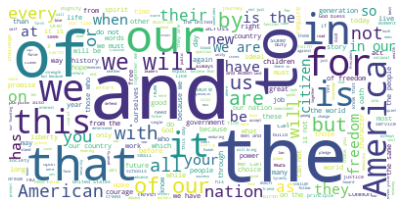

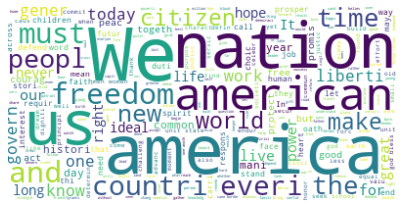

In [8]:
#%% Make separate Word Clouds of the words in C and words in E.

def wm(i, o):
	wordcloud_word_tokens = WordCloud(stopwords=set(), background_color="white", max_words=1000).generate(i)
	plt.figure(figsize=[7, 7])
	plt.imshow(wordcloud_word_tokens, interpolation="bilinear")
	plt.axis("off")
	plt.savefig(f"{o}.png", format="png")
	plt.show()
	return wordcloud_word_tokens

# def wm(i, o):
# 	mask = np.array(Image.open("usa.png"))
# 	wordcloud_word_tokens = WordCloud(stopwords=stop_words, background_color="white", max_words=1000, mask=mask).generate(i)
# 	image_colors = ImageColorGenerator(mask)
# 	plt.figure(figsize=[7, 7])
# 	plt.imshow(wordcloud_word_tokens.recolor(color_func=image_colors), interpolation="bilinear")
# 	plt.axis("off")
# 	plt.savefig(f"{o}.png", format="png")
# 	plt.show()
# 	return wordcloud_word_tokens

f = wm(' '.join(c), 'c'), wm(' '.join(e), 'e')

In [9]:
g = '''
    From the above word clouds, it is apparent that stopwords are, by far, the most commonly occurring 
    words in most corpora. Thus, they do not appear in the word cloud of e, compared to that of c.
    Also, stemming helps remove redundant forms of the same base word with different morphological
    inflections. Thus, less frequent different forms of the same words in c appear more frequent in the
    word cloud of e, indicating that stemming gives a better insight into the true distribution of words.
'''

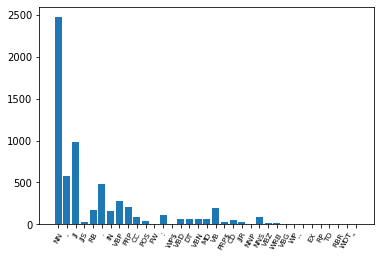

In [22]:
#%% Using POS tagging identify the frequency distribution of the different parts of speech of the words given in the text. (Use PennTree Tagset). Identify and represent the distribution via suitable visualization technique.

pos_tags = pos_tag(e)

h = freq_pos_tags = Counter(map(lambda x: x[1], pos_tags))

plt.bar(*zip(*freq_pos_tags.items()))
plt.xticks(rotation=60, fontsize=7.5)
plt.show()

In [11]:
#%% Each sentence can be scored as the sum of frequencies of individual words (excluding stop words). Identify the top 5 sentences based on this score.

freq_word_tokens = Counter(speeches_word_tokens)

i = top_sentences_freq_score = sorted(speeches_sentence_tokens, key=lambda sentence: sum(freq_word_tokens[word] for word in sentence if word not in stop_words), reverse=True)[:5]

print(i)

['Vice President Cheney, Mr. Chief Justice, President Carter, President Bush, President Clinton, members of the United States Congress, reverend clergy, distinguished guests, fellow citizens:\n  On this day, prescribed by law and marked by ceremony, we celebrate the durable wisdom of our Constitution, and recall the deep commitments that unite our country.', 'At a moment when the outcome of our revolution was most in doubt, the father of our nation ordered these words be read to the people:\n\n"Let it be told to the future world ... that in the depth of winter, when nothing but hope and virtue could survive ... that the city and the country, alarmed at one common danger, came forth to meet ...', 'What is required of us now is a new era of responsibility -- a recognition, on the part of every American, that we have duties to ourselves, our nation, and the world, duties that we do not grudgingly accept but rather seize gladly, firm in the knowledge that there is nothing so satisfying to 

In [12]:
#%% With the help of regular expressions, extract the words in E that have either numbers or other non-‐alphabetic characters.

r = re.compile(r'[^a-zA-Z]+')

j = non_alpha_containing_words = list(filter(r.search, e))

print(j)

[',', ',', ',', '.', ',', '.', ',', '.', '.', ',', "'s", ',', '.', ',', ',', '--', ',', '.', ',', 'slave-hold', ',', ',', '.', '--', ',', '.', ',', ',', '.', '.', ',', ',', '.', ',', "'s", '.', ',', '.', ',', ',', ',', '.', '225', ',', '.', ',', ',', ',', '.', '.', ',', ',', '.', ',', '.', ',', ',', '.', ':', '.', '.', '.', '.', ',', '.', '.', '.', ',', ',', ',', ',', '.', ',', "'s", ',', ',', '.', ',', ',', '.', ',', '.', ',', ',', '.', '.', ',', '.', ',', '.', ',', '.', '.', '.', ',', '.', ',', ',', '.', ',', ',', '.', ',', '.', '.', '.', ',', "'s", ',', '.', ',', '.', ',', '.', ',', '.', ',', '.', ':', ',', '.', '.', '.', '.', ',', '.', ',', ',', '.', ',', ',', "'s", '.', ',', '.', ',', '.', ',', ',', '.', ',', '.', ',', ',', ',', '.', '.', ',', '.', ',', '.', "'s", "'s", '.', ',', ',', '.', ',', '.', ':', ',', '.', ',', ',', '.', ',', '.', ',', '.', ',', '.', '.', ',', ',', ',', '.', '.', ',', '.', '.', ':', ',', ',', ',', '.', ',', '.', '.', ';', ';', ',', '.', ':', ',', ';', ',',